<a href="https://colab.research.google.com/github/FarhanABD/Belajar_Tailwind/blob/main/cleaning_text_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 21.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Baca file Excel
df = pd.read_excel("clean_text_jaki.xlsx")

# Cek nama kolom yang tersedia
print(df.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'clean_text_jaki.xlsx'

In [ ]:
import pandas as pd
import re
import emoji

# Baca file Excel
file_path = "clean_text_jaki.xlsx"  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):  # Pastikan input adalah string
        text = text.lower()  # Ubah menjadi huruf kecil
        text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
        text = emoji.replace_emoji(text, replace='')  # Hapus emoji atau stiker
    return text

# Terapkan fungsi ke kolom "clean_text"
df["clean_text"] = df["clean_text"].apply(clean_text)

# Simpan kembali ke Excel
df.to_excel("cleaned_data_btg1.xlsx", index=False)
print("Pembersihan selesai, file disimpan sebagai cleaned_data.xlsx")


Pembersihan selesai, file disimpan sebagai cleaned_data.xlsx


Grafik code GUI Streaamlit. Lanjutan code

In [ ]:
from google.colab import files
uploaded = files.upload()  # Pilih file Excel Anda


Saving data_sentimen_sorted_new.xlsx to data_sentimen_sorted_new.xlsx


Load data excel ke dataframe

In [ ]:
import pandas as pd

# Ganti 'data_sentimen_separated.xlsx' dengan nama file Anda
file_path = "/content/data_sentimen_sorted_new.xlsx"

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan 5 baris pertama
df.head()


,s,score,at,KBBI,content,clean_text,sentiment,sentiment_label,tokenized_text,stemmed,userName
0,Pak Kopral (Djono),1,########,NaN,"Aplikasi KATRO, mau sok komplit tapi error' tr...",aplikasi katro sok komplit error trusayo penge...,-1027,negatif,"['aplikasi', 'katro', ',', 'sok', 'komplit', '...","['a', 'p', 'l', 'i', 'k', 'a', 's', 'i', '', '...",NaN
1,J efrata sinulingga,1,########,NaN,Aplikasi nyesatkan gw udah daftar di aplikasi ...,aplikasi nyesatkan gw udah daftar aplikasi vak...,0,negatif,"['aplikasi', 'nyesatkan', 'gw', 'udah', 'dafta...","['a', 'p', 'l', 'i', 'k', 'a', 's', 'i', '', '...",NaN
2,Henry T.D.,1,########,NaN,saya sudah vaksin kedua dan sudah dapat tiket ...,vaksin tiket booster peduli lindungi aplikasi ...,0,negatif,"['vaksin', 'tiket', 'booster', 'peduli', 'lind...","['v', 'a', 'k', 's', 'i', 'n', '', 't', 'i', '...",NaN
3,Rehan Aditya,1,########,NaN,Terlalu banyak bug,bug,0,negatif,['bug'],"['b', 'u', 'g']",NaN
4,Panji Setia Rachman,1,########,NaN,Saya sebagai masyarakat pengguna setia JAKI ke...,masrakat pengguna setia jaki kecewa peraturan ...,-6341,negatif,"['masyarakat', 'pengguna', 'setia', 'jaki', 'k...","['m', 'a', 's', 'y', 'a', 'r', 'a', 'k', 'a', ...",NaN


memastikan kolom clean_text telah terisi

In [ ]:
df = df.dropna(subset=['clean_text'])  # Hapus baris kosong
texts = df['clean_text'].astype(str).tolist()  # Konversi ke list string


Load data ke dataframe

Menghitung TF-IDF

In [ ]:
# # Inisialisasi TF-IDF Vectorizer
# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(texts)

# # Konversi hasil ke DataFrame
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Menampilkan 5 baris pertama hasil TF-IDF
# tfidf_df.head()

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TF-IDF Vectorizer dengan filter kata minimal 3 huruf
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]{3,}\b')
tfidf_matrix = vectorizer.fit_transform(texts)

# Konversi hasil ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 5 baris pertama hasil TF-IDF
tfidf_df.head()



,aaa,aaaaaa,aaja,aamiin,abal,abalabal,abang,abget,abis,abisin,...,youtube,yra,yth,yuk,zahrapie,zaki,zaman,zolim,zong,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan Histogram

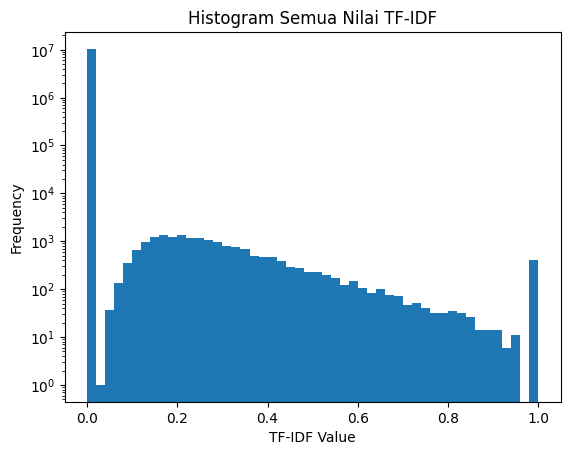

In [ ]:
from matplotlib import pyplot as plt

# Flatten semua nilai TF-IDF menjadi satu array
all_tfidf_values = tfidf_df.values.flatten()

# Plot histogram
plt.hist(all_tfidf_values, bins=50, log=True)
plt.title('Histogram Semua Nilai TF-IDF')
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.show()

# tfidf_df['23'].plot(kind='hist', bins=50, log=True, title='23')

# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(tfidf_df.columns.tolist())

['aaa', 'aaaaaa', 'aaja', 'aamiin', 'abal', 'abalabal', 'abang', 'abget', 'abis', 'abisin', 'abisss', 'absen', 'absensi', 'abu', 'acara', 'acc', 'acting', 'action', 'ada', 'adadan', 'adakan', 'adako', 'adalah', 'adasemoga', 'adatidak', 'adatp', 'adik', 'adil', 'adilan', 'adit', 'adkaan', 'adm', 'admin', 'administrasi', 'adu', 'aduan', 'aduh', 'aduhhh', 'aduhhhh', 'aduin', 'adul', 'afkajajaki', 'after', 'aga', 'agar', 'agh', 'agr', 'agustus', 'ahok', 'air', 'aja', 'ajaa', 'ajah', 'ajalah', 'ajamau', 'ajatrus', 'ajawong', 'aje', 'ajib', 'ajing', 'ajja', 'ajukan', 'akal', 'akan', 'akar', 'akbarrrrrrrrrrrrrr', 'akes', 'akhiran', 'akibat', 'akse', 'akses', 'aksi', 'aksih', 'aktif', 'aktifasi', 'aktifitas', 'aktifkan', 'aktivasi', 'aktivitas', 'aktual', 'akun', 'akunini', 'akuntabilitas', 'akurasi', 'akurat', 'akusuka', 'alaikum', 'alamat', 'alami', 'alangkah', 'alasan', 'alat', 'album', 'alesan', 'alfaindomart', 'alhamdulillah', 'alhamdulillahjaki', 'alhamdullah', 'alhasil', 'alias', 'alihk

In [ ]:
print(tfidf_df.describe())
print(tfidf_df.head())

               aaa       aaaaaa         aaja       aamiin         abal  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000   
mean      0.000484     0.000146     0.000194     0.000265     0.000914   
std       0.016607     0.007079     0.009400     0.009750     0.026137   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.573014     0.343619     0.456268     0.433158     0.901125   

          abalabal        abang        abget         abis       abisin  ...  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000  ...   
mean      0.000470     0.000218     0.000306     0.001503     0.000168  ...   
std       0.016604     0.008119     0.014859     0.020985     0.008176  ...   
min       0.00000

Menyimpan hasil output TF-IDF excel

In [ ]:
output_path = "/content/hasil_tfidf6.xlsx"
tfidf_df.to_excel(output_path, index=False)

print("Hasil TF-IDF berhasil disimpan di:", output_path)

KeyboardInterrupt: 

memvisualisasikan 10 data tertinggi TF-IDF menjadi diagram

<ipython-input-8-d16229d4551c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")


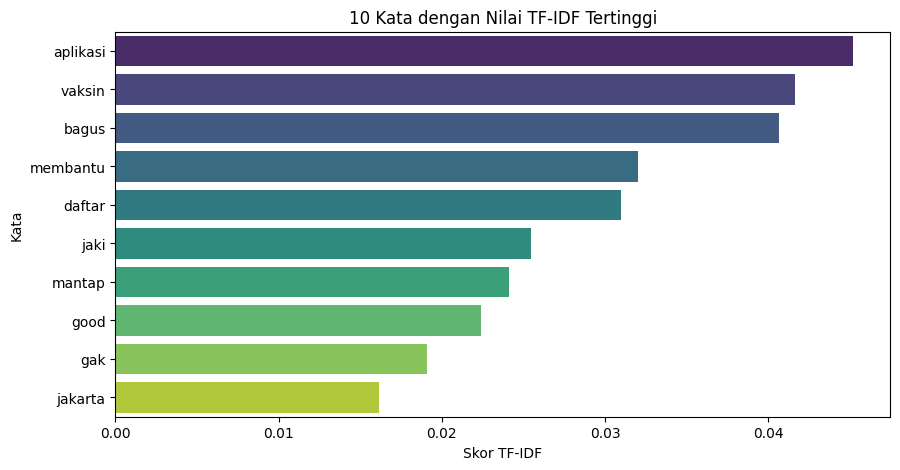

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Contoh vectorizer
vectorizer = TfidfVectorizer()


# Hitung rata-rata skor TF-IDF tiap kata
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

# Pilih 10 kata dengan nilai TF-IDF tertinggi
top_words = tfidf_mean.head(10)

# Membuat bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")

plt.xlabel("Skor TF-IDF")
plt.ylabel("Kata")
plt.title("10 Kata dengan Nilai TF-IDF Tertinggi")
plt.show()

In [ ]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan path file dataset Anda
data = pd.read_excel("data_sentimen_sorted_new.xlsx")

# Cek apakah dataset berhasil dimuat
print(data.head())


                     s  score        at KBBI  \
0   Pak Kopral (Djono)      1  ########  NaN   
1  J efrata sinulingga      1  ########  NaN   
2           Henry T.D.      1  ########  NaN   
3         Rehan Aditya      1  ########  NaN   
4  Panji Setia Rachman      1  ########  NaN   

                                             content  \
0  Aplikasi KATRO, mau sok komplit tapi error' tr...   
1  Aplikasi nyesatkan gw udah daftar di aplikasi ...   
2  saya sudah vaksin kedua dan sudah dapat tiket ...   
3                                 Terlalu banyak bug   
4  Saya sebagai masyarakat pengguna setia JAKI ke...   

                                          clean_text sentiment  \
0  aplikasi katro sok komplit error trusayo penge...     -1027   
1  aplikasi nyesatkan gw udah daftar aplikasi vak...         0   
2  vaksin tiket booster peduli lindungi aplikasi ...         0   
3                                                bug         0   
4  masrakat pengguna setia jaki kecewa perat

In [ ]:
from sklearn.model_selection import train_test_split

X = data['clean_text']  # Gantilah 'clean_text' dengan kolom fitur di dataset
y = data['sentiment_label']  # Gantilah 'sentiment_label' dengan kolom target

print(X.head(), y.head())  # Cek apakah variabel sudah benar


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)  # Pastikan data terbagi dengan benar


0    aplikasi katro sok komplit error trusayo penge...
1    aplikasi nyesatkan gw udah daftar aplikasi vak...
2    vaksin tiket booster peduli lindungi aplikasi ...
3                                                  bug
4    masrakat pengguna setia jaki kecewa peraturan ...
Name: clean_text, dtype: object 0    negatif
1    negatif
2    negatif
3    negatif
4    negatif
Name: sentiment_label, dtype: object
(1898,) (1898,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'X_train' and 'y_train' from previous cell are a pandas Series or DataFrame
# 1. Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to the entire training data (X_train) and transform it
X_train_vec = vectorizer.fit_transform(X_train.astype(str)) # Convert to string explicitly

# 3. Now apply SMOTE to the vectorized training data and the corresponding labels
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vec, y_train)

# 4. Print the shapes to verify
print(X_train_balanced.shape, y_train_balanced.shape)  # Cek apakah SMOTE berhasil

(3096, 4173) (3096,)


In [ ]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
data = pd.read_excel("data_sentimen_sorted_new.xlsx")  # Ganti dengan nama dataset yang benar

# 2. Pastikan kolom teks dan label ada
print(data.head())

# 3. Konversi teks ke vektor numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
data["clean_text"] = data["clean_text"].fillna('')  # Replace NaN with empty string
x_tfidf = vectorizer.fit_transform(data["clean_text"])


# 4. Ubah label menjadi numerik jika masih string
le = LabelEncoder()
y_encoded = le.fit_transform(data["sentiment_label"])  # Ganti dengan kolom label yang benar

# 5. Bagi dataset menjadi train-test
# 🐛 Fixed: Changed 'X_tfidf' to 'x_tfidf' to use the correct variable name
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y_encoded, test_size=0.2, random_state=42)

# 6. Terapkan SMOTE untuk menyeimbangkan data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 7. Simpan model dan vectorizer
model = MultinomialNB()
joblib.dump(model, "model_sentimen.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model dan vectorizer berhasil disimpan!")

                     s  score        at KBBI  \
0   Pak Kopral (Djono)      1  ########  NaN   
1  J efrata sinulingga      1  ########  NaN   
2           Henry T.D.      1  ########  NaN   
3         Rehan Aditya      1  ########  NaN   
4  Panji Setia Rachman      1  ########  NaN   

                                             content  \
0  Aplikasi KATRO, mau sok komplit tapi error' tr...   
1  Aplikasi nyesatkan gw udah daftar di aplikasi ...   
2  saya sudah vaksin kedua dan sudah dapat tiket ...   
3                                 Terlalu banyak bug   
4  Saya sebagai masyarakat pengguna setia JAKI ke...   

                                          clean_text sentiment  \
0  aplikasi katro sok komplit error trusayo penge...     -1027   
1  aplikasi nyesatkan gw udah daftar aplikasi vak...         0   
2  vaksin tiket booster peduli lindungi aplikasi ...         0   
3                                                bug         0   
4  masrakat pengguna setia jaki kecewa perat

Confussion Matrix

Akurasi: 0.7563559322033898
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.76      0.89      0.82       259
      netral       0.09      0.13      0.11        23
     positif       0.91      0.65      0.76       190

    accuracy                           0.76       472
   macro avg       0.59      0.56      0.56       472
weighted avg       0.79      0.76      0.76       472



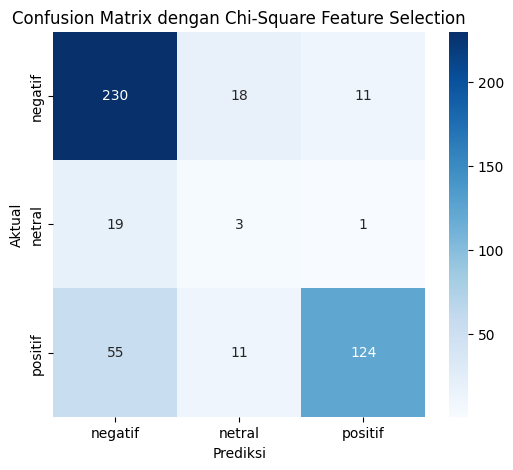

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# Pastikan jumlah data fitur dan label sama
assert len(tfidf_df) == len(df['sentiment_label']), "Jumlah baris pada TF-IDF dan label tidak cocok!"

# Konversi label ke angka jika masih berupa teks
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])

X = tfidf_df  # Fitur (TF-IDF matrix)

# Split data menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)

# **SMOTE diterapkan pada training set**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Chi-Square Feature Selection**
k_features = 1000  # Pilih 1000 fitur terbaik
chi2_selector = SelectKBest(chi2, k=k_features)

# Fit hanya pada training data
X_train_chi2 = chi2_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_chi2 = chi2_selector.transform(X_test)  # Transformasi data test sesuai fitur yang dipilih

# Inisialisasi model Naïve Bayes
model = MultinomialNB(alpha=0.5)

# Melatih model
model.fit(X_train_chi2, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test_chi2)

# Evaluasi Model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))

#  **Visualisasi Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
cm_labels = le.classes_  # Label kategori

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix dengan Chi-Square Feature Selection")
plt.show()


Ambil skor chi square

<ipython-input-15-4122672ecf07>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Chi2 Score", y="Feature", data=top_chi2, palette="Blues_r")


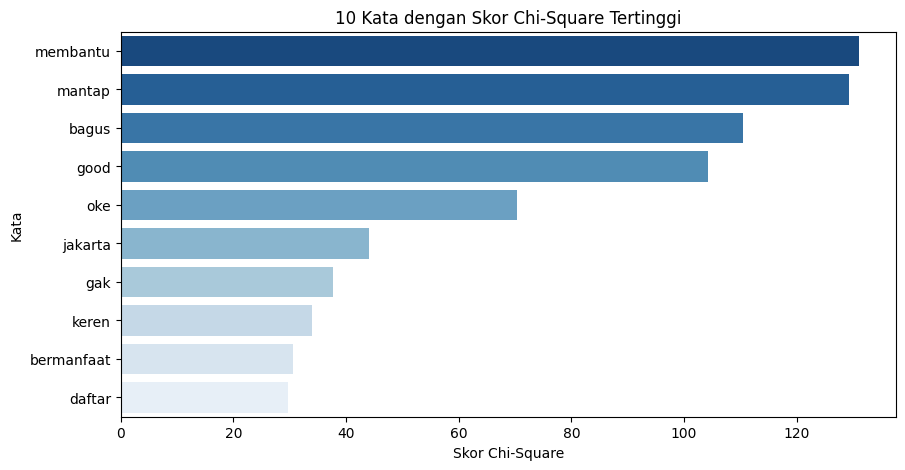

In [ ]:
#  Ambil skor Chi-Square dan nama fitur
feature_scores = chi2_selector.scores_  # Skor Chi-Square untuk tiap fitur
feature_names = tfidf_df.columns  # Nama fitur dari TF-IDF

# Buat DataFrame untuk skor Chi-Square
chi2_df = pd.DataFrame({"Feature": feature_names, "Chi2 Score": feature_scores})

# Urutkan berdasarkan skor tertinggi
top_chi2 = chi2_df.nlargest(10, "Chi2 Score")

#  **Visualisasi 10 Kata dengan Skor Chi-Square Tertinggi**
plt.figure(figsize=(10, 5))
sns.barplot(x="Chi2 Score", y="Feature", data=top_chi2, palette="Blues_r")
plt.xlabel("Skor Chi-Square")
plt.ylabel("Kata")
plt.title("10 Kata dengan Skor Chi-Square Tertinggi")
plt.show()


In [ ]:
!pip install imbalanced-learn

Distribusi SMOTE

Distribusi sebelum SMOTE (Training Set):
0    0.549894
2    0.402335
1    0.047771
Name: proportion, dtype: float64

Distribusi setelah SMOTE (Training Set):
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Distribusi kelas di Testing Set:
0    0.548729
2    0.402542
1    0.048729
Name: proportion, dtype: float64

Akurasi: 0.7669491525423728
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.80      0.85      0.82       259
      netral       0.16      0.30      0.21        23
     positif       0.87      0.72      0.79       190

    accuracy                           0.77       472
   macro avg       0.61      0.62      0.61       472
weighted avg       0.80      0.77      0.78       472



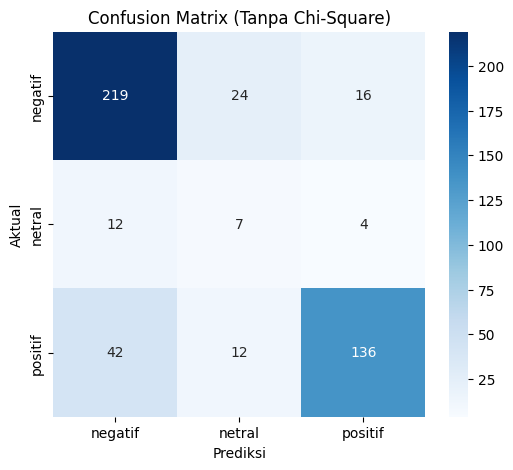

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan jumlah data fitur dan label sama
assert len(tfidf_df) == len(df['sentiment_label']), "Jumlah baris pada TF-IDF dan label tidak cocok!"

# Konversi label ke angka jika masih berupa teks
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])

X = tfidf_df  # Fitur (TF-IDF matrix)

# Split data menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)

# 📌 **Cek distribusi kelas sebelum SMOTE**
print("Distribusi sebelum SMOTE (Training Set):")
print(pd.Series(y_train).value_counts(normalize=True))

# 📌 **SMOTE diterapkan pada training set**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 📌 **Cek distribusi kelas setelah SMOTE**
print("\nDistribusi setelah SMOTE (Training Set):")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# 📌 **Cek distribusi kelas di testing set**
print("\nDistribusi kelas di Testing Set:")
print(pd.Series(y_test).value_counts(normalize=True))

# Inisialisasi model Naïve Bayes dengan alpha yang bisa di-tuning
model = MultinomialNB(alpha=0.5)  # Coba ubah alpha untuk meningkatkan performa

# 📌 **Gunakan data hasil SMOTE untuk pelatihan model**
model.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 📊 **Visualisasi Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
cm_labels = le.classes_  # Label kategori

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix (Tanpa Chi-Square)")
plt.show()


Optional Code iam not sure about this

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# # 🐛 Fixed: Apply Chi-Square feature selection to X_test as well
# X_test_chi2 = chi2_selector.transform(X_test)

# # Prediksi model
# y_pred = model.predict(X_test_chi2)

# # Hitung metrik evaluasi
# report = classification_report(y_test, y_pred, output_dict=True)
# accuracy = accuracy_score(y_test, y_pred)

# # Visualisasi Confusion Matrix
# plt.figure(figsize=(6,5))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
# plt.xlabel("Prediksi")
# plt.ylabel("Aktual")
# plt.title("Confusion Matrix")
# plt.show()

# # Visualisasi Akurasi dan Metrik Evaluasi
# metrics = ['precision', 'recall', 'f1-score']
# categories = list(report.keys())[:-3]  # Ambil kategori kecuali avg/total

# plt.figure(figsize=(8,5))
# for metric in metrics:
#     scores = [report[category][metric] for category in categories]
#     plt.plot(categories, scores, marker='o', label=metric)

# plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Akurasi ({accuracy:.2f})')
# plt.title("Evaluasi Model")
# plt.xlabel("Kategori")
# plt.ylabel("Skor")
# plt.legend()
# plt.show()
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# ... (Your existing code for data loading, preprocessing, and splitting) ...

# **SMOTE diterapkan pada training set**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Chi-Square Feature Selection**
# 🐛 Fixed: Apply Chi-square BEFORE SMOTE
k_features = 1000  # Pilih 1000 fitur terbaik
chi2_selector = SelectKBest(chi2, k=k_features)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)  # Fit on original training data

# Apply SMOTE to the selected features
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_chi2, y_train)

# Transform test data using the same selector
X_test_chi2 = chi2_selector.transform(X_test)

# ... (Rest of your code for model training, prediction, and evaluation) ...

Install wordcloud

In [ ]:
!pip install wordcloud
!pip install wordcloud matplotlib pandas
print(data.columns)

Index(['s', 'score', 'at', 'KBBI', 'content', 'clean_text', 'sentiment',
       'sentiment_label', 'tokenized_text', 'stemmed', 'userName'],
      dtype='object')


In [ ]:
print(df[['sentiment_label', 'clean_text']].head())  # Cek data awal
print(df['clean_text'].isna().sum())  # Cek apakah ada nilai NaN
print(df['clean_text'].apply(lambda x: len(str(x).split())).describe())  # Cek jumlah kata

  sentiment_label                                         clean_text
0         negatif  aplikasi katro sok komplit error trusayo penge...
1         negatif  aplikasi nyesatkan gw udah daftar aplikasi vak...
2         negatif  vaksin tiket booster peduli lindungi aplikasi ...
3         negatif                                                bug
4         negatif  masrakat pengguna setia jaki kecewa peraturan ...
0
count    2356.000000
mean        9.814941
std        10.459614
min         1.000000
25%         2.000000
50%         6.000000
75%        14.000000
max        71.000000
Name: clean_text, dtype: float64


In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 🔹 Load dataset dari Excel (pastikan path benar)
data = pd.read_excel("data_sentimen_sorted_cleaned.xlsx")

# 🔹 Cek apakah kolom 'sentiment_label' dan 'clean_text' ada di dataset
print(data.columns)  # Untuk memastikan ada kolom yang benar

# 🔹 Fungsi untuk membuat WordCloud per kelas
stopwords = set(STOPWORDS)

def generate_wordcloud(data, label, title):
    # Pilih teks berdasarkan label sentimen
    text = " ".join(data[data['sentiment_label'] == label]['clean_text'].astype(str))

    # Buat WordCloud
    wordcloud = WordCloud(
        width=1000,
        height=1000,
        background_color="white",
        stopwords=stopwords
    ).generate(text)

    # Tampilkan WordCloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{title} - {label}")
    plt.show()

# 🔹 Pastikan kolom yang dibutuhkan ada sebelum iterasi
if 'sentiment_label' in data.columns and 'clean_text' in data.columns:
    for label in data['sentiment_label'].unique():
        generate_wordcloud(data, label, "WordCloud Tanpa Chi-Square")
else:
    print("Error: Kolom 'sentiment_label' atau 'clean_text' tidak ditemukan dalam dataset!")

# 🔹 Hitung jumlah data per kelas dengan 'sentiment_label'
class_counts = data['sentiment_label'].value_counts()

# 🔹 Buat Pie Chart dengan label sentimen
plt.figure(figsize=(8, 8))  # Ukuran lebih besar
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen'])
plt.title("Distribusi Sentimen Tanpa Chi-Square")
plt.axis("equal")  # Pastikan pie chart berbentuk lingkaran sempurna
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data_sentimen_sorted_cleaned.xlsx'

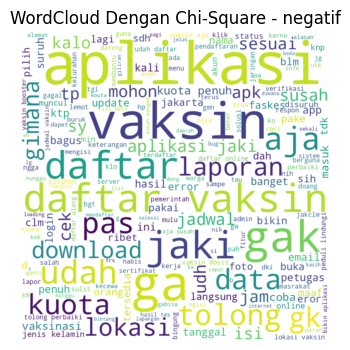

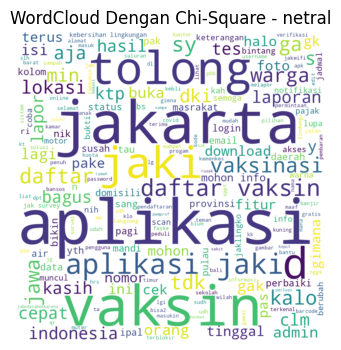

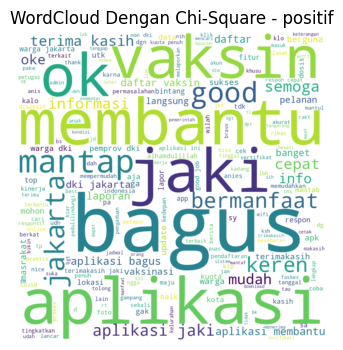

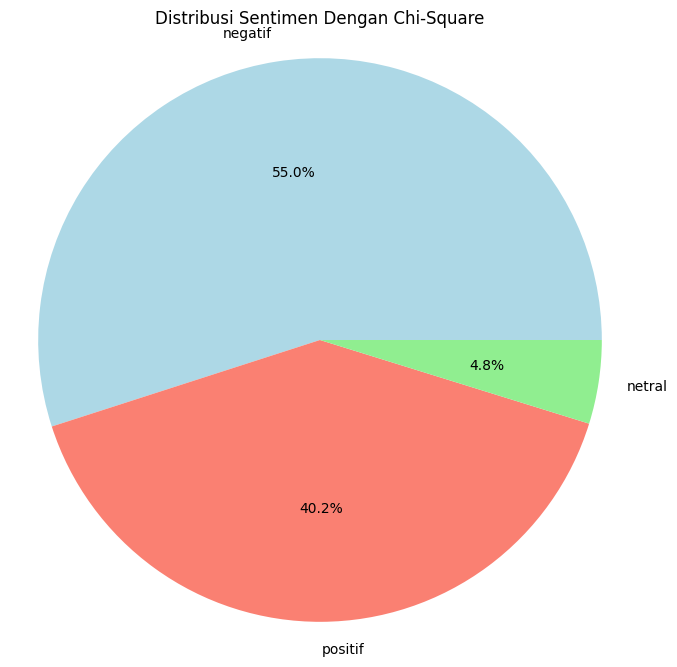

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 🔹 Gunakan kembali dataset setelah Chi-Square
chi_data = df[['sentiment_label', 'clean_text']].copy()  # Simpan hanya kolom penting

# 🐛 Fixed: Re-encode 'sentiment_label' based on values in 'chi_data'
# This ensures the lengths match.
le = LabelEncoder()
chi_data['sentiment_label_encoded'] = le.fit_transform(chi_data['sentiment_label'])
y_chi = chi_data['sentiment_label_encoded']
chi_data['sentiment_label'] = le.inverse_transform(y_chi)  # Konversi angka ke label asli

# 🔹 Cek apakah kolom yang dibutuhkan tersedia
if 'sentiment_label' in chi_data.columns and 'clean_text' in chi_data.columns:
    stopwords = set(STOPWORDS)

    # 🔹 Fungsi untuk membuat WordCloud per kelas
    def generate_wordcloud(data, label, title):
        text = " ".join(data[data['sentiment_label'] == label]['clean_text'].astype(str))

        wordcloud = WordCloud(
            width=1000,
            height=1000,
            background_color="white",
            stopwords=stopwords
        ).generate(text)

        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{title} - {label}")
        plt.show()

    # 🔹 Buat WordCloud untuk setiap label sentimen
    for label in chi_data['sentiment_label'].unique():
        generate_wordcloud(chi_data, label, "WordCloud Dengan Chi-Square")

    # 🔹 Hitung jumlah data per kelas setelah Chi-Square
    chi_class_counts = chi_data['sentiment_label'].value_counts()

    # 🔹 Buat Pie Chart dengan label sentimen
    plt.figure(figsize=(8, 8))
    plt.pie(chi_class_counts, labels=chi_class_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen'])
    plt.title("Distribusi Sentimen Dengan Chi-Square")
    plt.axis("equal")  # Pastikan pie chart berbentuk lingkaran sempurna
    plt.show()

else:
    print("Error: Kolom 'sentiment_label' atau 'clean_text' tidak ditemukan dalam dataset!")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = tfidf_df  # Features (TF-IDF values)
y = df['sentiment_label']
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and testing sets (if not already done)
#from sklearn.model_selection import train_test_split # Import if not already imported
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model, using X_train instead of X_train_tfidf
model_rf.fit(X_train, y_train)

# Prediksi, using X_test instead of X_test_tfidf
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 0.836864406779661
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       259
           1       0.00      0.00      0.00        23
           2       0.82      0.87      0.85       190

    accuracy                           0.84       472
   macro avg       0.56      0.59      0.57       472
weighted avg       0.80      0.84      0.82       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Install Streamlit

In [ ]:
!pip install streamlit
!npm install -g localtunnel
!pip show streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 400.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 9s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋Name: streamlit
Version: 1.45.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [ ]:
!pip install --upgrade streamlit

In [ ]:
!pip install streamlit pyngrok


In [ ]:
!find /content -name "app.py"


In [ ]:
!cat /content/app.py


cat: /content/app.py: No such file or directory


In [ ]:
import pandas as pd

df = pd.read_excel("data_sentimen_sorted_new.xlsx")  # Ganti dengan file Anda

print(f"Jumlah baris DataFrame: {len(df)}")

# Cek jumlah baris di awal
print(f"Jumlah baris DataFrame: {len(df)}")

# Contoh data tambahan yang ingin dimasukkan
new_values = [2356]  # Data yang ingin dimasukkan (ganti dengan variabel Anda)

# Cek apakah panjang data baru sesuai dengan jumlah baris DataFrame
if len(new_values) == len(df):
    df["new_column"] = new_values
else:
    print(f"⚠️ Jumlah baris tidak sesuai! DataFrame: {len(df)}, Data Baru: {len(new_values)}")

    # Jika new_values lebih panjang, potong agar sesuai
    if len(new_values) > len(df):
        new_values = new_values[:len(df)]

    # Jika new_values lebih pendek, tambahkan NaN agar panjangnya sesuai
    else:
        new_values = list(new_values) + [np.nan] * (len(df) - len(new_values))

    # Masukkan data setelah penyesuaian
    df["new_column"] = new_values

# Cek kembali setelah penyesuaian
print(f"✅ Data berhasil dimasukkan, jumlah baris akhir: {len(df)}")


FileNotFoundError: [Errno 2] No such file or directory: 'data_sentimen_sorted_new.xlsx'

In [ ]:
!pip install streamlit pyngrok openpyxl

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import chi2_contingency

st.title("📊 Aplikasi Analisis Data & Visualisasi Sentimen")

uploaded_file = st.file_uploader("Upload dataset CSV atau Excel (Maksimal 50MB)", type=["csv", "xlsx"])

MAX_FILE_SIZE_MB = 50

if uploaded_file:
    file_size_mb = uploaded_file.size / (1024 * 1024)

    if file_size_mb > MAX_FILE_SIZE_MB:
        st.error(f"Ukuran file terlalu besar! Maksimum {MAX_FILE_SIZE_MB}MB.")
    else:
        try:
            if uploaded_file.name.endswith('.csv'):
                df = pd.read_csv(uploaded_file, encoding="ISO-8859-1")
            else:
                df = pd.read_excel(uploaded_file)

            st.success(f"✅ File berhasil diunggah ({file_size_mb:.2f} MB).")
            st.write("📌 **Data yang diunggah:**")
            st.dataframe(df.head())

            if "clean_text" in df.columns and "sentiment_label" in df.columns:
                tab1, tab2, tab3 = st.tabs(["Tanpa Chi-Square", "Dengan Chi-Square", "Word Cloud"])

                with tab1:
                    st.subheader("📊 Distribusi Sentimen Tanpa Chi-Square")
                    sentiment_counts = df["sentiment_label"].value_counts()

                    fig, ax = plt.subplots(figsize=(8, 4))
                    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax, palette="Set2")
                    ax.set_title("Distribusi Sentimen Tanpa Chi-Square")
                    ax.set_xlabel("Sentiment Label")
                    ax.set_ylabel("Frekuensi")
                    st.pyplot(fig)


                with tab2:
                    st.subheader("📊 Analisis Chi-Square")

                    contingency_table = pd.crosstab(df["sentiment_label"], columns="count")
                    chi2, p, dof, expected = chi2_contingency(contingency_table)

                    # DataFrame untuk perbandingan observed vs expected
                    observed = contingency_table["count"]
                    expected = pd.Series(np.round(expected).flatten(), index=contingency_table.index)

                    chi_df = pd.DataFrame({
                        "Observed": observed,
                        "Expected": expected
                    })

                    st.write("📌 **Hasil distribusi sentimen chi-square:**")
                    st.dataframe(chi_df)

                    # Bar Chart
                    fig, ax = plt.subplots(figsize=(8, 4))
                    # chi_df.plot(kind="bar", ax=ax)
                    chi_df[["Observed"]].plot(kind="bar", ax=ax, legend=True, color="skyblue")
                    plt.title("Distribusi sentimen dengan chi-square")
                    plt.xlabel("Sentiment Label")
                    plt.ylabel("Frekuensi")
                    plt.xticks(rotation=0)
                    st.pyplot(fig)

                    st.write(f"📌 **Nilai Chi-Square**: {chi2:.2f}")
                    st.write(f"📌 **p-value**: {p:.4f} (Jika < 0.05, berarti ada perbedaan signifikan)")



                with tab3:
                    st.subheader("☁️ WordCloud per Sentimen")
                    stopwords = set(STOPWORDS)

                    for label in df["sentiment_label"].unique():
                        text = " ".join(df[df["sentiment_label"] == label]["clean_text"].dropna())
                        wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)
                        st.image(wordcloud.to_array(), caption=f"WordCloud - {label}")

            else:
                st.error("❌ Dataset harus memiliki kolom 'clean_text' dan 'sentiment_label'!")

        except Exception as e:
            st.error(f"Terjadi kesalahan saat membaca file: {e}")

Writing app.py


In [ ]:
from pyngrok import ngrok
import time

# Ganti dengan token ngrok Anda
!ngrok authtoken 2uYp3Yv9sSFl9B6VT5dXt1qXSXS_3xG2usiFQQiRo8ca2y5Bh

# Pastikan kamu sudah menulis app.py sebelumnya
!streamlit run app.py &
time.sleep(10)

# Tunggu sebentar lalu expose ke ngrok
public_url = ngrok.connect(8501)
print(f"Aplikasi bisa diakses publik via: {public_url}")


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.58.123.25:8501

  Stopping...
Aplikasi bisa diakses publik via: NgrokTunnel: "https://f130-34-58-123-25.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!ngrok http 8501 & streamlit run app.py --server.port 8501 --server.enableCORS false --server.headless true > log.txt 2>&1 &

ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.
ERROR:  Read more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config
ERROR:  You can view your current agent sessions in the dashboard:
ERROR:  https://dashboard.ngrok.com/agents
ERROR:  
ERROR:  ERR_NGROK_108
ERROR:  https://ngrok.com/docs/errors/err_ngrok_108
ERROR:  
